<a href="https://colab.research.google.com/github/guifav/curso-ia-aplicada/blob/main/Gerador_Dataset_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GERADOR DE DADOS SINTÉTICOS PARA MODELO DE PREVISÃO DE CHURN

Gerando dados de treinamento...

Estatísticas dos dados de treinamento:
- Total de registros: 1000
- Taxa de churn: 34.70%
- Clientes com churn: 347 de 1000

Amostra dos dados de treinamento:


,ID_Cliente,Idade,Genero,Estado_Civil,Tempo_Cliente_Meses,Tipo_Servico,Valor_Mensal,Tipo_Contrato,Tickets_Suporte_3m,Tempo_Medio_Resposta_Hrs,...,Score_NPS,Metodo_Pagamento,Dias_Desde_Ultimo_Contato,Atrasos_Pagamento_6m,Recursos_Adicionais,Em_Promocao,Reclamacoes_Recentes,Queda_Uso,Probabilidade_Churn,Churn
0,CL001001,49,Masculino,Solteiro,25,Básico,39.34,Mensal,0,9.111144,...,74,Pix,41,2,4,False,False,False,0.439167,0
1,CL001002,39,Masculino,Solteiro,1,Básico,42.11,Mensal,1,19.867953,...,63,Boleto,19,1,0,False,False,False,0.500000,1
2,CL001003,51,Feminino,Solteiro,11,Padrão,62.84,Anual,1,18.209567,...,55,Cartão de Crédito,41,2,0,False,False,False,0.330000,1
3,CL001004,64,Feminino,Solteiro,39,Padrão,50.80,Mensal,1,2.904932,...,67,Pix,85,0,1,False,True,False,0.407500,1
4,CL001005,38,Masculino,Divorciado,13,Básico,45.66,Anual,1,15.089983,...,65,Cartão de Crédito,89,0,0,True,False,True,0.239167,0


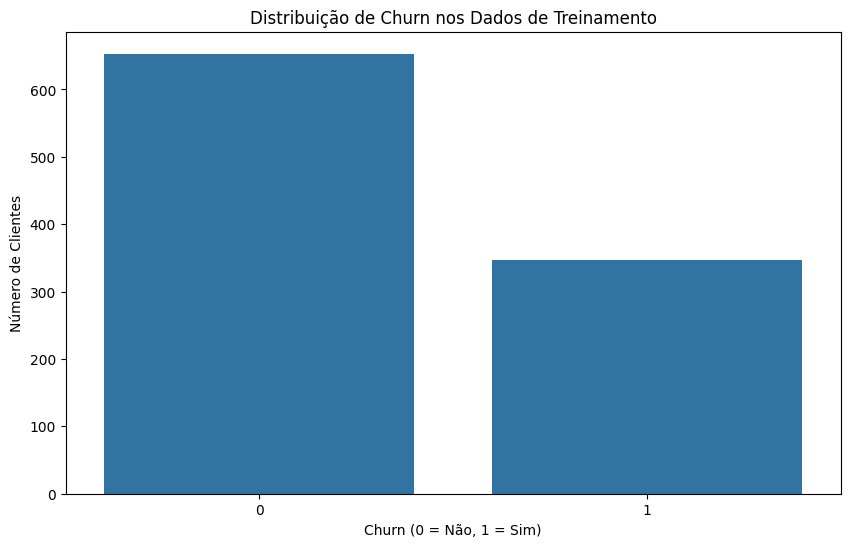


Gerando dados para previsão...

Amostra dos dados para previsão:


,ID_Cliente,Idade,Genero,Estado_Civil,Tempo_Cliente_Meses,Tipo_Servico,Valor_Mensal,Tipo_Contrato,Tickets_Suporte_3m,Tempo_Medio_Resposta_Hrs,Frequencia_Uso,Score_NPS,Metodo_Pagamento,Dias_Desde_Ultimo_Contato,Atrasos_Pagamento_6m,Recursos_Adicionais,Em_Promocao,Reclamacoes_Recentes,Queda_Uso
0,CL001001,65,Feminino,Solteiro,7,Padrão,58.38,Mensal,3,3.230683,Baixo,39,Pix,95,0,1,False,False,True
1,CL001002,37,Feminino,Solteiro,33,Premium,92.83,Mensal,0,3.705557,Médio,81,Cartão de Crédito,59,1,0,True,False,False
2,CL001003,26,Outro,Casado,3,Básico,49.37,Anual,3,62.153568,Médio,60,Cartão de Crédito,17,1,1,True,False,False
3,CL001004,60,Masculino,Casado,12,Padrão,70.05,Mensal,0,3.223132,Baixo,55,Boleto,171,0,0,True,False,False
4,CL001005,37,Feminino,Solteiro,25,Padrão,62.77,Mensal,1,3.280403,Alto,84,Cartão de Crédito,95,2,0,True,False,False



Deseja fazer o download dos arquivos gerados? (s/n): s

Preparando arquivos para download...
Arquivo dados_treinamento_churn_20250328_135213.csv criado com 1000 registros.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Arquivo dados_previsao_churn_20250328_135213.csv criado com 100 registros.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Download concluído.

RESUMO DOS DADOS GERADOS

Dados de treinamento:
- Contém registros históricos de 1000 clientes
- Inclui a coluna 'Churn' que indica se o cliente cancelou (1) ou não (0)
- Taxa de churn nos dados: 34.70%

Dados para previsão:
- Contém informações de 100 novos clientes
- Não inclui a coluna 'Churn' (simulando dados atuais onde não sabemos o resultado)

Ambos os conjuntos contêm as mesmas colunas de características, incluindo:
- Dados demográficos (idade, gênero, estado civil)
- Informações do serviço (tipo, valor, tempo como cliente)
- Interações com suporte (tickets, tempo de resposta)
- Comportamento de uso e pagamento
- Indicadores de alerta (reclamações, queda de uso)

Estes dados são sintéticos e foram gerados para teste do seu modelo de previsão de churn.
As probabilidades de churn foram calculadas com base em relações realistas entre as variáveis.


In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from datetime import datetime, timedelta
import random

# Configurações
np.random.seed(42)  # Para reprodutibilidade
random.seed(42)

# Função para gerar dados sintéticos de clientes
def generate_customer_data(num_samples, include_churn=True):
    # Dados demográficos
    idades = np.random.normal(42, 15, num_samples).astype(int)
    idades = np.clip(idades, 18, 85)  # Limitando a idade entre 18 e 85 anos

    generos = np.random.choice(['Masculino', 'Feminino', 'Outro'], num_samples, p=[0.48, 0.48, 0.04])

    estados_civis = np.random.choice(['Solteiro', 'Casado', 'Divorciado', 'Viúvo'],
                                     num_samples,
                                     p=[0.4, 0.4, 0.15, 0.05])

    # Dados de serviço
    tempo_cliente = np.random.exponential(24, num_samples).astype(int)  # Meses como cliente
    tempo_cliente = np.clip(tempo_cliente, 1, 120)  # Entre 1 mês e 10 anos

    tipos_servico = np.random.choice(['Básico', 'Padrão', 'Premium'], num_samples, p=[0.3, 0.5, 0.2])

    # Planos e valores
    valores_mensais = []
    for tipo in tipos_servico:
        if tipo == 'Básico':
            valor = np.random.uniform(29.99, 49.99, 1)[0]
        elif tipo == 'Padrão':
            valor = np.random.uniform(49.99, 79.99, 1)[0]
        else:  # Premium
            valor = np.random.uniform(79.99, 119.99, 1)[0]
        valores_mensais.append(round(valor, 2))

    # Contratos
    tipos_contrato = np.random.choice(['Mensal', 'Anual', 'Bienal'], num_samples, p=[0.6, 0.3, 0.1])

    # Dados de interação
    tickets_suporte = np.random.poisson(1.5, num_samples)  # Tickets de suporte nos últimos 3 meses
    tempo_medio_resposta = np.random.exponential(12, num_samples)  # Horas para resposta

    # Uso do serviço
    frequencia_uso = np.random.choice(['Baixo', 'Médio', 'Alto'], num_samples, p=[0.25, 0.5, 0.25])

    # Satisfação do cliente (0-100)
    nps_scores = []
    for freq in frequencia_uso:
        if freq == 'Baixo':
            score = np.random.normal(60, 15, 1)[0]
        elif freq == 'Médio':
            score = np.random.normal(75, 10, 1)[0]
        else:  # Alto
            score = np.random.normal(85, 8, 1)[0]
        nps_scores.append(min(max(int(score), 0), 100))

    # Métodos de pagamento
    metodos_pagamento = np.random.choice(['Cartão de Crédito', 'Débito Automático', 'Boleto', 'Pix'],
                                        num_samples,
                                        p=[0.45, 0.25, 0.2, 0.1])

    # Último contato (dias atrás)
    ultimo_contato = np.random.randint(1, 180, num_samples)

    # Atrasos de pagamento nos últimos 6 meses
    atrasos_pagamento = np.random.poisson(0.8, num_samples)

    # Recursos adicionais contratados
    num_recursos = np.random.poisson(1.2, num_samples)

    # Status de promoção
    em_promocao = np.random.choice([True, False], num_samples, p=[0.3, 0.7])

    # Indicadores de alerta
    reclamacoes_recentes = np.random.choice([True, False], num_samples, p=[0.15, 0.85])
    queda_uso = np.random.choice([True, False], num_samples, p=[0.2, 0.8])

    # Churn (se solicitado)
    # Vamos criar uma função que calcule a probabilidade de churn baseada em diversos fatores
    if include_churn:
        churn = []
        churn_proba = []

        for i in range(num_samples):
            # Fatores que aumentam a probabilidade de churn
            prob = 0.1  # Base

            # Fatores demográficos
            if estados_civis[i] == 'Solteiro':
                prob += 0.02

            # Tempo como cliente
            if tempo_cliente[i] < 6:
                prob += 0.15  # Clientes novos têm maior probabilidade de cancelar
            elif tempo_cliente[i] < 12:
                prob += 0.05
            else:
                prob -= 0.01 * min(tempo_cliente[i] / 12, 5)  # Diminui até -0.05 para clientes antigos

            # Tipo de serviço e contrato
            if tipos_servico[i] == 'Básico':
                prob += 0.03
            if tipos_contrato[i] == 'Mensal':
                prob += 0.15  # Contratos mensais têm maior churn
            else:
                prob -= 0.1  # Contratos mais longos têm menor churn

            # Valor mensal
            if valores_mensais[i] > 100:
                prob += 0.05  # Preços altos aumentam churn

            # Interações
            if tickets_suporte[i] > 3:
                prob += 0.1  # Muitos tickets indicam problemas
            if tempo_medio_resposta[i] > 24:
                prob += 0.08  # Respostas lentas aumentam churn

            # Uso e satisfação
            if frequencia_uso[i] == 'Baixo':
                prob += 0.1  # Uso baixo aumenta churn
            if nps_scores[i] < 50:
                prob += 0.2  # Baixa satisfação aumenta muito o churn

            # Pagamentos
            if metodos_pagamento[i] == 'Boleto':
                prob += 0.03  # Boletos têm maior chance de esquecimento/cancelamento
            if atrasos_pagamento[i] > 1:
                prob += 0.07 * atrasos_pagamento[i]  # Atrasos aumentam churn

            # Contato e promoções
            if ultimo_contato[i] > 90:
                prob += 0.05  # Sem contato recente aumenta churn
            if not em_promocao[i]:
                prob += 0.02  # Sem promoção aumenta um pouco

            # Alertas
            if reclamacoes_recentes[i]:
                prob += 0.15  # Reclamações são um grande indicador
            if queda_uso[i]:
                prob += 0.12  # Queda de uso é preocupante

            # Limitar entre 0.01 e 0.95
            prob = max(min(prob, 0.95), 0.01)
            churn_proba.append(prob)

            # Determinação final do churn
            is_churn = np.random.random() < prob
            churn.append(1 if is_churn else 0)

    # Criando o DataFrame
    data = {
        'ID_Cliente': [f'CL{str(i+1001).zfill(6)}' for i in range(num_samples)],
        'Idade': idades,
        'Genero': generos,
        'Estado_Civil': estados_civis,
        'Tempo_Cliente_Meses': tempo_cliente,
        'Tipo_Servico': tipos_servico,
        'Valor_Mensal': valores_mensais,
        'Tipo_Contrato': tipos_contrato,
        'Tickets_Suporte_3m': tickets_suporte,
        'Tempo_Medio_Resposta_Hrs': tempo_medio_resposta,
        'Frequencia_Uso': frequencia_uso,
        'Score_NPS': nps_scores,
        'Metodo_Pagamento': metodos_pagamento,
        'Dias_Desde_Ultimo_Contato': ultimo_contato,
        'Atrasos_Pagamento_6m': atrasos_pagamento,
        'Recursos_Adicionais': num_recursos,
        'Em_Promocao': em_promocao,
        'Reclamacoes_Recentes': reclamacoes_recentes,
        'Queda_Uso': queda_uso
    }

    if include_churn:
        data['Probabilidade_Churn'] = churn_proba
        data['Churn'] = churn

    df = pd.DataFrame(data)

    return df

# Função para salvar e fazer download dos arquivos
def save_and_download(df, filename):
    df.to_csv(filename, index=False)
    print(f"Arquivo {filename} criado com {len(df)} registros.")
    files.download(filename)

# Função principal
def main():
    print("="*70)
    print("GERADOR DE DADOS SINTÉTICOS PARA MODELO DE PREVISÃO DE CHURN")
    print("="*70)

    # Gerando dados para treinamento (com coluna de churn)
    print("\nGerando dados de treinamento...")
    df_train = generate_customer_data(1000, include_churn=True)

    # Estatísticas básicas dos dados de treinamento
    churn_rate = df_train['Churn'].mean() * 100
    print(f"\nEstatísticas dos dados de treinamento:")
    print(f"- Total de registros: {len(df_train)}")
    print(f"- Taxa de churn: {churn_rate:.2f}%")
    print(f"- Clientes com churn: {df_train['Churn'].sum()} de {len(df_train)}")

    # Amostra dos dados de treinamento
    print("\nAmostra dos dados de treinamento:")
    display(df_train.head())

    # Visualização da distribuição de churn
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Churn', data=df_train)
    plt.title('Distribuição de Churn nos Dados de Treinamento')
    plt.xlabel('Churn (0 = Não, 1 = Sim)')
    plt.ylabel('Número de Clientes')
    plt.show()

    # Gerando dados para previsão (sem coluna de churn)
    print("\nGerando dados para previsão...")
    df_predict = generate_customer_data(100, include_churn=False)

    # Amostra dos dados de previsão
    print("\nAmostra dos dados para previsão:")
    display(df_predict.head())

    # Salvando os arquivos
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    train_filename = f"dados_treinamento_churn_{timestamp}.csv"
    predict_filename = f"dados_previsao_churn_{timestamp}.csv"

    # Perguntar se o usuário deseja fazer o download
    download_files = input("\nDeseja fazer o download dos arquivos gerados? (s/n): ").strip().lower()

    if download_files == 's':
        print("\nPreparando arquivos para download...")
        save_and_download(df_train, train_filename)
        save_and_download(df_predict, predict_filename)
        print("\nDownload concluído.")
    else:
        # Apenas salvar localmente
        df_train.to_csv(train_filename, index=False)
        df_predict.to_csv(predict_filename, index=False)
        print(f"\nArquivos salvos localmente: {train_filename} e {predict_filename}")

    # Informações sobre os dados gerados
    print("\n" + "="*70)
    print("RESUMO DOS DADOS GERADOS")
    print("="*70)

    print("\nDados de treinamento:")
    print("- Contém registros históricos de 1000 clientes")
    print("- Inclui a coluna 'Churn' que indica se o cliente cancelou (1) ou não (0)")
    print(f"- Taxa de churn nos dados: {churn_rate:.2f}%")

    print("\nDados para previsão:")
    print("- Contém informações de 100 novos clientes")
    print("- Não inclui a coluna 'Churn' (simulando dados atuais onde não sabemos o resultado)")

    print("\nAmbos os conjuntos contêm as mesmas colunas de características, incluindo:")
    print("- Dados demográficos (idade, gênero, estado civil)")
    print("- Informações do serviço (tipo, valor, tempo como cliente)")
    print("- Interações com suporte (tickets, tempo de resposta)")
    print("- Comportamento de uso e pagamento")
    print("- Indicadores de alerta (reclamações, queda de uso)")

    print("\nEstes dados são sintéticos e foram gerados para teste do seu modelo de previsão de churn.")
    print("As probabilidades de churn foram calculadas com base em relações realistas entre as variáveis.")

# Executar o sistema
if __name__ == "__main__":
    main()